<a href="https://colab.research.google.com/github/handsomekiwi/JupyterPractice/blob/master/ML_course_HW/Y2019%20HW10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalMaxPooling2D,BatchNormalization
import os  

In [0]:
def isDisplayAvl():  
    return 'DISPLAY' in os.environ.keys()  

In [0]:
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  

In [0]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

In [0]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 

In [0]:
np.random.seed(10)

In [0]:
#Cifra-10 有50000筆training data 10000筆testing data 32*32的彩色圖片 共10類
(x_train_image, y_train_label), (x_test_image, y_test_label)=cifar10.load_data()


In [0]:
# normalize and onehot
x_train_normalize=x_train_image.astype('float32')/255.0
x_test_normalize=x_test_image.astype('float32')/255.0  


y_train_onehot=np_utils.to_categorical(y_train_label)
y_test_onehot=np_utils.to_categorical(y_test_label)

In [0]:

#create model
model=Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(32,32,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same', 
                 input_shape=(16,16,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

In [143]:
#show the model
model.summary()  
print("") 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_136 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_137 (Dropout)        (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 4096)              0         
__________

In [160]:
#create model
model=Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(32,32,3)))
                
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same', 
                 input_shape=(16,16,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

model.summary()  
print("") 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_51 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_164 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 16, 16, 64)        256       
__________

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 16s - loss: 0.4330 - acc: 0.8448 - val_loss: 0.7821 - val_acc: 0.7524
Epoch 2/20
 - 11s - loss: 0.3723 - acc: 0.8677 - val_loss: 0.9702 - val_acc: 0.7102
Epoch 3/20
 - 11s - loss: 0.3340 - acc: 0.8812 - val_loss: 1.0680 - val_acc: 0.6949
Epoch 4/20
 - 11s - loss: 0.2941 - acc: 0.8950 - val_loss: 1.0290 - val_acc: 0.7178
Epoch 5/20
 - 11s - loss: 0.2644 - acc: 0.9062 - val_loss: 0.8080 - val_acc: 0.7658
Epoch 6/20
 - 11s - loss: 0.2389 - acc: 0.9143 - val_loss: 1.7369 - val_acc: 0.6133
Epoch 7/20
 - 11s - loss: 0.2207 - acc: 0.9219 - val_loss: 0.9343 - val_acc: 0.7500
Epoch 8/20
 - 11s - loss: 0.2016 - acc: 0.9289 - val_loss: 1.5276 - val_acc: 0.6436
Epoch 9/20
 - 11s - loss: 0.1913 - acc: 0.9315 - val_loss: 1.1007 - val_acc: 0.7343
Epoch 10/20
 - 11s - loss: 0.1801 - acc: 0.9357 - val_loss: 1.0805 - val_acc: 0.7358
Epoch 11/20
 - 11s - loss: 0.1620 - acc: 0.9423 - val_loss: 1.1555 - val_acc: 0.7211
Epoch 12/20
 - 11s - los

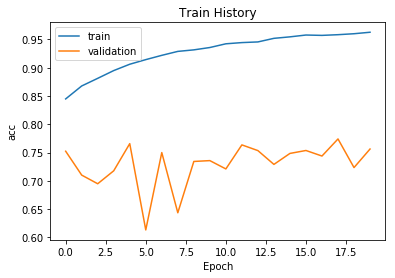

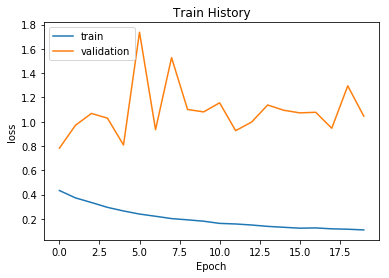

10000/10000 [==============================] - 2s 152us/step

	[Info] Accuracy of testing data = 74.7%


In [162]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=128,verbose=2)
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(x_test_normalize, y_test_onehot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

In [0]:
# 原始71.8
#Dropout增減有影響 
# 後面filter數沒增加，準確率越小 epoch 訓練多有機會找到好 73%-74.7%
#多增加convolution 有助於model解析特徵
#對每個neuron到激勵函數間 做正規化(batch normalizaton有助於正確率提升 73%